In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

from sklearn.metrics import confusion_matrix

In [3]:
train = pd.read_csv("Dig-MNIST.csv")
validate = pd.read_csv("Dig-MNIST.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_images = train.drop("label", axis = 1)
train_labels = train.label
val_images = validate.drop("label", axis = 1)
val_labels = validate.label

In [7]:
train_labels

0        0
1        1
2        2
3        3
4        4
        ..
10235    5
10236    6
10237    7
10238    8
10239    9
Name: label, Length: 10240, dtype: int64

In [8]:
train_images = train_images / 255.
val_images = val_images / 255.

In [9]:
train_images = train_images.values.reshape(-1,28,28,1)
val_images = val_images.values.reshape(-1,28,28,1)

In [10]:
print("the shape of the training set is ", train_images.shape)

the shape of the training set is  (10240, 28, 28, 1)


In [15]:
image = train_images[10239,:,:,:]
image.shape

(28, 28, 1)

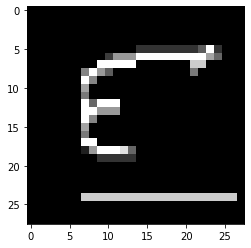

In [16]:
plt.imshow(image, cmap = 'gray')
plt.show()

In [17]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [18]:
train_labels[0, :]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, random_state = 0, test_size = 0.2)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [27]:
epochs=5
batch_size=64

In [28]:
history=model.fit(train_images,train_labels,batch_size = batch_size, epochs = epochs)

Epoch 1/5
128/128 [==============================] - 3s 15ms/step - loss: 0.4540 - accuracy: 0.8602
Epoch 2/5
128/128 [==============================] - 2s 16ms/step - loss: 0.1491 - accuracy: 0.9551
Epoch 3/5
128/128 [==============================] - 2s 18ms/step - loss: 0.0737 - accuracy: 0.9800
Epoch 4/5
128/128 [==============================] - 2s 17ms/step - loss: 0.0407 - accuracy: 0.9891
Epoch 5/5
128/128 [==============================] - 2s 16ms/step - loss: 0.0224 - accuracy: 0.9948


Text(0, 0.5, 'accuracy')

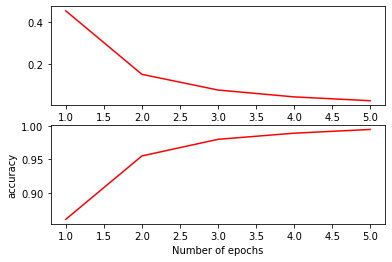

In [31]:
fig,ax = plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color = 'red')

ax[1].plot(x,history.history['accuracy'],color = 'red')

plt.xlabel("Number of epochs")
plt.ylabel("accuracy")

In [32]:
prediction = model.predict(test_images)

64/64 [==============================] - 0s 3ms/step


In [33]:
prediction

array([[6.95337892e-01, 1.53841882e-03, 1.47057727e-01, ...,
        1.62696961e-06, 1.54684812e-01, 8.48373456e-05],
       [1.55123416e-05, 3.07860321e-10, 2.95761481e-07, ...,
        3.68991532e-10, 1.25038343e-06, 9.99967396e-01],
       [1.24787824e-04, 1.14698025e-07, 3.09146650e-04, ...,
        4.30721866e-06, 9.98996019e-01, 3.50967071e-06],
       ...,
       [5.14834028e-07, 9.99999344e-01, 4.64893084e-08, ...,
        1.96370014e-08, 4.32968648e-08, 5.82187701e-11],
       [1.58927605e-07, 2.32209771e-07, 5.49108790e-06, ...,
        1.34756125e-03, 1.30200988e-07, 3.21801432e-04],
       [1.91939282e-08, 1.51244510e-08, 1.02392939e-09, ...,
        1.05089160e-09, 3.47653440e-07, 1.79826243e-09]], dtype=float32)

In [35]:
predictions = []
for item in prediction:
    result = item.argmax()
    predictions.append(result)

In [36]:
predictions[0:10]

[0, 9, 8, 5, 6, 1, 4, 2, 8, 3]

In [37]:
prediction[0].argmax()

0

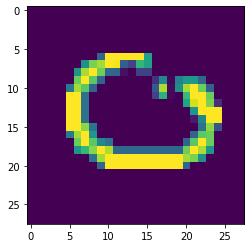

In [38]:
image = test_images[0, :, :, :]
plt.imshow(image)
plt.show()

In [42]:
predictions = to_categorical(predictions)

In [48]:
actuals = []
predicteds = []
for actual, predicted in zip(test_labels, predictions):
    actuals.append(actual.argmax())
    predicteds.append(predicted.argmax())

In [49]:
confusion_matrix(actuals, predicteds)

array([[179,   3,   1,   1,   0,   0,   1,   0,   0,   0],
       [ 11, 202,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 204,   0,   0,   0,   0,   0,   2,   0],
       [  1,   0,   2, 233,   3,   1,   0,   2,   0,   0],
       [  1,   0,   0,   0, 190,   1,   1,   0,   1,   1],
       [  0,   0,   0,   3,   2, 197,   0,   0,   0,   0],
       [  2,   1,   6,   1,   1,   0, 181,   6,   1,   2],
       [  0,   0,   7,   0,   1,   0,   2, 189,   0,   0],
       [  2,   0,   0,   1,   1,   0,   2,   0, 197,   1],
       [  1,   1,   0,   0,   0,   0,   3,   0,   2, 194]], dtype=int64)